# Practice 1

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy.stats import chi2

In [14]:
np.random.seed(42)

## Step 1&2

In [15]:
def parabolic(x, a, b, c):
    return a * x**2 + b * x + c

In [16]:
# Generate synthetic data
true_a = 2.0
true_b = 1.0
true_c = 0.5

sigma0 = 3.0

# Generate data
n_data = 10
n_sets = 1000

x = np.linspace(-5, 5, n_data)

## Step 3

In [17]:
all_data    = []
fit_results = []
chi2_values = []

In [18]:
for i in range(n_sets):
    # Generate synthetic data with noise
    y = parabolic(x, true_a, true_b, true_c) + np.random.normal(0, sigma0, size=x.shape)
    all_data.append(y)
    # Fit the data
    popt, pcov = curve_fit(parabolic, x, y)
    
    # Calculate chi-squared
    residuals = y - parabolic(x, *popt)
    chi2_value = np.sum((residuals / sigma0)**2)
    
    fit_results.append(popt)
    chi2_values.append(chi2_value)

In [19]:
all_data = np.array(all_data)
fit_results = np.array(fit_results)
chi2_values = np.array(chi2_values)

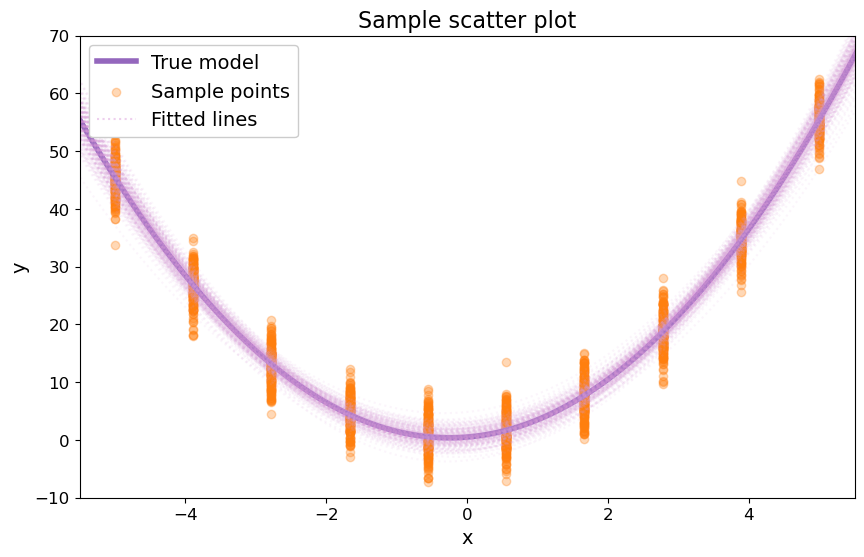

In [20]:
# Display the results
plt.figure(figsize=(10, 6))

x_plot = np.linspace(-8, 8, 500)
plt.plot(x_plot, parabolic(x_plot, true_a, true_b, true_c), color='C4', label='True model', 
         linewidth=4, linestyle='-')

sampled_sets = np.random.choice(n_sets, 200, replace=False)
for i in sampled_sets:
    plt.scatter(x, all_data[i, :], color='C1', alpha=0.3)
    plt.plot(x_plot, parabolic(x_plot, *fit_results[i]), color='plum', alpha=0.1, 
             linewidth=1.5, linestyle=':')

plt.scatter([], [], color='C1', alpha=0.3, label='Sample points')
plt.plot([], [], color='plum', alpha=0.5, linewidth=1.5, label='Fitted lines', linestyle=':')

plt.title('Sample scatter plot', fontsize=16)
plt.xlim(-5.5, 5.5)
plt.ylim(-10, 70)
plt.xlabel('x', fontsize=14)
plt.xticks(fontsize=12)
plt.ylabel('y', fontsize=14)
plt.yticks(fontsize=12)
plt.legend(fontsize=14, loc='upper left', framealpha=1)
plt.savefig("output1_1.pdf", transparent=True)
plt.show()

<>:12: SyntaxWarning: invalid escape sequence '\m'
<>:12: SyntaxWarning: invalid escape sequence '\m'
/var/folders/43/jyz_5vx92ls0wqy_1gc8b1nr0000gn/T/ipykernel_97348/950316358.py:12: SyntaxWarning: invalid escape sequence '\m'
  plt.text(np.mean(chi2_values)+0.5, 0.12, f'$\mu$={np.mean(chi2_values):.3f}',


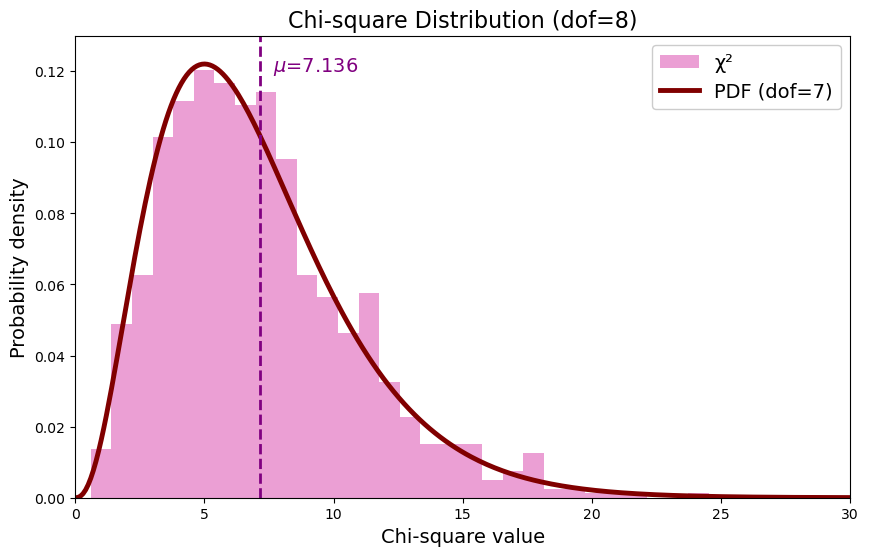

In [21]:
#chi square直方圖
plt.figure(figsize=(10, 6))

plt.hist(chi2_values, bins=30, density=True, alpha=0.7, label='χ²', color='C6', 
         histtype='stepfilled')

x_chi = np.linspace(0, 50, 500)
plt.plot(x_chi, chi2.pdf(x_chi, df=7), linestyle='-', color='maroon', label='PDF (dof=7)', 
         linewidth=3.5)
plt.plot([np.mean(chi2_values), np.mean(chi2_values)], [0, 0.2], linestyle='--', 
         color="purple", lw=2, label='__no_legend__')
plt.text(np.mean(chi2_values)+0.5, 0.12, f'$\mu$={np.mean(chi2_values):.3f}', 
         fontsize=14, color='purple')

plt.title('Chi-square Distribution (dof=8)', fontsize=16)
plt.xlabel('Chi-square value', fontsize=14)
plt.ylabel('Probability density', fontsize=14)
plt.xlim(left=0, right=30)
plt.ylim(bottom=0, top=0.13)
plt.legend(fontsize=14, framealpha=1)
plt.savefig("output1_2.pdf", transparent=True)
plt.show()

In [22]:
from math import gamma

def chi2_p_value(chi2_value, dof):
    """
    Calculate the p-value for a given chi-square value and degrees of freedom (dof).
    """
    # Compute the incomplete gamma function (upper tail)
    incomplete_gamma = gamma(dof / 2) - sum((chi2_value / 2)**k / gamma(k + 1) for k in range(dof // 2))
    
    # Compute the p-value
    p_value = incomplete_gamma / gamma(dof / 2)
    return p_value

# Example usage
dof = 7  # degrees of freedom
p_values = [chi2_p_value(chi2, dof) for chi2 in chi2_values]
print(p_values[:10])  # Print the first 10 p-values

[np.float64(-0.7837467453874182), np.float64(-0.9319771266760546), np.float64(-0.3589148313132687), np.float64(-4.588650321458625), np.float64(-1.8120742088359663), np.float64(-0.6221783006580229), np.float64(-1.0873883586345057), np.float64(-7.596467756642464), np.float64(-0.8989050861469703), np.float64(-0.1503227509027701)]


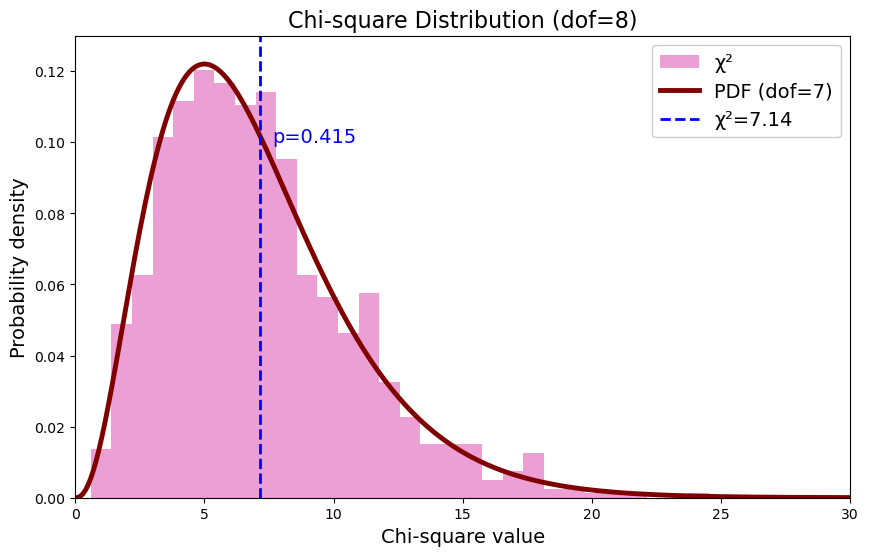

In [23]:
# Select a specific χ² value and calculate its p-value
specific_chi2_value = np.mean(chi2_values)  # Use the χ² value at index i
specific_p_value = chi2.sf(specific_chi2_value, df=dof)  # Calculate p-value using survival function

# Plot the histogram
plt.figure(figsize=(10, 6))
plt.hist(chi2_values, bins=30, density=True, alpha=0.7, label='χ²', color='C6', histtype='stepfilled')

# Plot the χ² PDF
x_chi = np.linspace(0, 50, 500)
plt.plot(x_chi, chi2.pdf(x_chi, df=dof), linestyle='-', color='maroon', label='PDF (dof=7)', linewidth=3.5)

# Mark the specific χ² value
plt.axvline(specific_chi2_value, color='blue', linestyle='--', linewidth=2, label=f'χ²={specific_chi2_value:.2f}')
plt.text(specific_chi2_value + 0.5, 0.1, f'p={specific_p_value:.3f}', fontsize=14, color='blue')

# Add labels, title, and legend
plt.title('Chi-square Distribution (dof=8)', fontsize=16)
plt.xlabel('Chi-square value', fontsize=14)
plt.ylabel('Probability density', fontsize=14)
plt.xlim(left=0, right=30)
plt.ylim(bottom=0, top=0.13)
plt.legend(fontsize=14, framealpha=1)

# Save and show the plot
plt.savefig("output1_3.pdf", transparent=True)
plt.show()

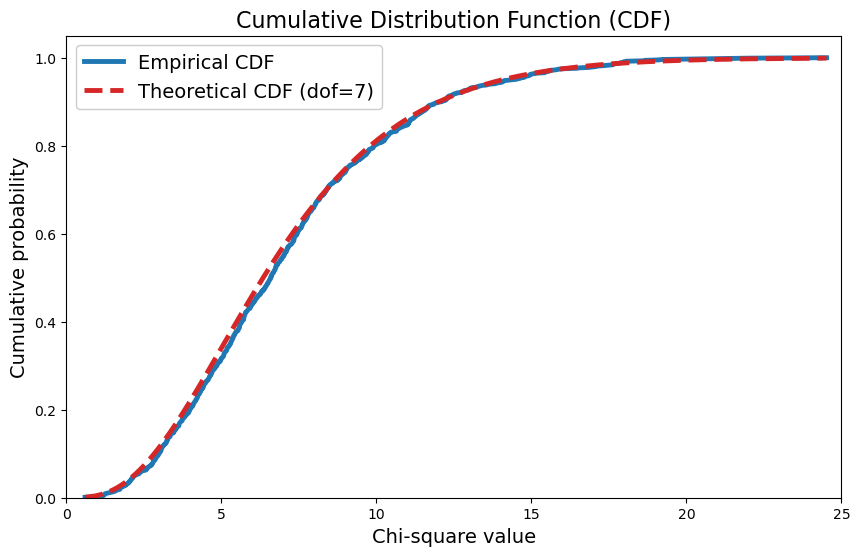

In [24]:
# Sort the chi-squared values
sorted_chi2_values = np.sort(chi2_values)

# Compute the cumulative probabilities
cumulative_probabilities = np.arange(1, len(sorted_chi2_values) + 1) / len(sorted_chi2_values)

# Plot the CDF
plt.figure(figsize=(10, 6))
plt.plot(sorted_chi2_values, cumulative_probabilities, label='Empirical CDF', color='C0', linewidth=3.5)

# Overlay the theoretical CDF for comparison
theoretical_cdf = chi2.cdf(sorted_chi2_values, df=dof)
plt.plot(sorted_chi2_values, theoretical_cdf, label='Theoretical CDF (dof=7)', color='C3', linestyle='--', linewidth=3.5)

# Add labels, title, and legend
plt.title('Cumulative Distribution Function (CDF)', fontsize=16)
plt.xlim(left=0, right=25)
plt.xlabel('Chi-square value', fontsize=14)
plt.ylim(bottom=0, top=1.05)
plt.ylabel('Cumulative probability', fontsize=14)
plt.legend(fontsize=14, framealpha=1)

# Save and show the plot
plt.savefig("output1_4.pdf", transparent=True)
plt.show()